### Actividad 6 - Punto 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import pydotplus
from IPython.display import Image
from sklearn import tree

#### Importar Dataset

Se modificaron las etiquetas de salida del dataset del punto 1, creandose 3 etiquetas en total:
- nivel de glucosa entre **70-180**, NORMAL
- nivel de glucosa **<70**, HIPOGLUCEMIA
- nivel de glucosa **>180**, HIPERGLUCEMIA

In [2]:
# importar el archivo .csv
data = pd.read_csv('glucosa-freestyle-clasificacion.csv')

In [3]:
data.head(5)


,Dispositivo,serial_number,time,record_type,glucose_level,glucose_level_type
0,FreeStyle Libre,JCGB319-K0305,1/5/2022 14:07,0,42,HIPOGLUCEMIA
1,FreeStyle Libre,JCGB319-K0305,1/5/2022 14:22,0,63,HIPOGLUCEMIA
2,FreeStyle Libre,JCGB319-K0305,1/5/2022 14:37,0,119,NORMAL
3,FreeStyle Libre,JCGB319-K0305,1/5/2022 14:52,0,135,NORMAL
4,FreeStyle Libre,JCGB319-K0305,1/5/2022 15:07,0,144,NORMAL


In [4]:
# crear un dataframe con las columnas glucose_level y glucose_level_type
df = pd.DataFrame(data, columns=['glucose_level','glucose_level_type'])

In [5]:
nivel_glucosa = df.iloc[:, 0].to_numpy()
tipo_nivel_glucosa = df.iloc[:, 1].to_numpy()

In [6]:
# separacion de los datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(nivel_glucosa,tipo_nivel_glucosa, train_size = 0.8 )

#### Creacion del modelo de Arbol de Clasificacion

In [7]:
# instancia del modelo de Arbol de Clasificacion
arbol_decision = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
# entrenamiento del modelo
modelo_entrenado = arbol_decision.fit(x_train.reshape(-1, 1), y_train)

In [9]:
# prediccion del tipo de nivel de glucosa usando los datos de prueba
y_pred = modelo_entrenado.predict(x_test.reshape(-1, 1))

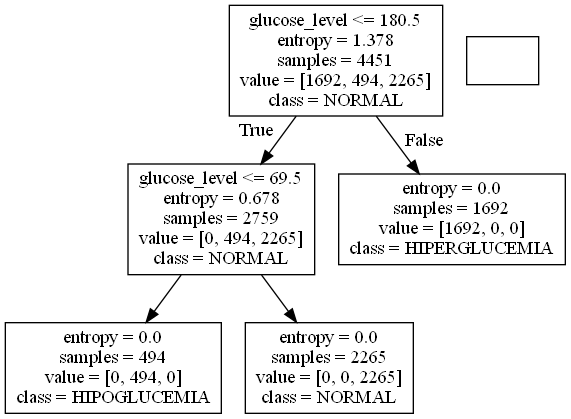

In [10]:
# grafica del modelo
feature_names = ['glucose_level']
class_names = ['HIPERGLUCEMIA','HIPOGLUCEMIA', 'NORMAL']

dot_data = tree.export_graphviz(arbol_decision, 
                                out_file=None,
                                feature_names=feature_names,
                                class_names=np.array(class_names))

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [11]:
# Ejemplo de prediccion
y2 = modelo_entrenado.predict(np.array([73]).reshape(-1, 1))
y2

array(['NORMAL'], dtype=object)

### Actividad 6 - Punto 4

#### Evaluacion del Modelo

In [12]:
# uso de la matriz de confusion para evaluacion del modelo
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[404,   0,   0],
       [  0, 117,   0],
       [  0,   0, 592]], dtype=int64)

In [13]:
def EvaluacionModelo(y_test, y_pred):
    pre_s = metrics.precision_score(y_test, y_pred, average='micro')
    rec_s = metrics.recall_score(y_test, y_pred, average='micro')
    f1_s = metrics.f1_score(y_test, y_pred, average='micro')
    accu_s = metrics.accuracy_score(y_test, y_pred)
    return (pre_s, rec_s, f1_s, accu_s)

In [14]:
precision, recall, f1, accuracy = EvaluacionModelo(y_test, y_pred)
print(f"Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")

Precision: 1.0, Recall: 1.0, F1: 1.0, Accuracy: 1.0
